In [ ]:
!pip install -r node2vec/requirements.txt

In [ ]:
!pip install --upgrade gensim

In [60]:
!python node2vec/src/main.py --input jrtechs.edgelist --output output/jrtechs2.emd --num-walks=40 --dimensions=50

Walk iteration:
1 / 40
2 / 40
3 / 40
4 / 40
5 / 40
6 / 40
7 / 40
8 / 40
9 / 40
10 / 40
11 / 40
12 / 40
13 / 40
14 / 40
15 / 40
16 / 40
17 / 40
18 / 40
19 / 40
20 / 40
21 / 40
22 / 40
23 / 40
24 / 40
25 / 40
26 / 40
27 / 40
28 / 40
29 / 40
30 / 40
31 / 40
32 / 40
33 / 40
34 / 40
35 / 40
36 / 40
37 / 40
38 / 40
39 / 40
40 / 40


In [72]:
labels=[]
vectors=[]

with open("output/jrtechs2.emd") as fp:
    for line in fp:
        l_list = list(map(float, line.split()))
        vectors.append(l_list[1::])
        labels.append(line.split()[0])
        
print(len(labels))

39


In [73]:
name_map = {}
with open("friendsMap.map") as fp:
    for line in fp:
        name_map[line.split()[0]] = line.split()[1]

In [63]:
name_map

{'76561198188400721': 'jrtechs',
 '76561198049526995': 'Noosh',
 '76561198067517157': 'nweis76',
 '76561198131175960': 'Delta_∆',
 '76561198084464357': 'Ceta',
 '76561198085584420': 'PureMaths',
 '76561198068647768': 'Void',
 '76561198094968588': 'Dumcumpster',
 '76561198107069713': 'yankeeman1081',
 '76561198086854442': 'jspike397',
 '76561198273751201': 'Kyon',
 '76561198083124245': 'drichardson005',
 '76561198035606013': 'BK🐻',
 '76561198255835078': 'Zelazny',
 '76561198170096391': 'Greata',
 '76561198306786411': 'fazeboojujee',
 '76561198062501319': 'Cantankerous',
 '76561198036270560': 'Toaster',
 '76561198306443796': 'numstudequals1',
 '76561198133044936': 'Panda',
 '76561198095814450': 'Tbonedog',
 '76561198069739846': 'Alminikar',
 '76561198233398192': 'Saxophones',
 '76561198162654610': 'Raydan',
 '76561198047367972': 'Oberyn',
 '76561198057450983': 'TraceTheKitteh',
 '76561198176504246': 'shistthis',
 '76561198111538799': 'sergiozygmunt',
 '76561198853827591': 'theramendragon

In [75]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                      

def reduce_dimensions(labels, vectors, num_dimensions=2):
    
    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

vectors
x_vals, y_vals, labels = reduce_dimensions(labels, vectors)

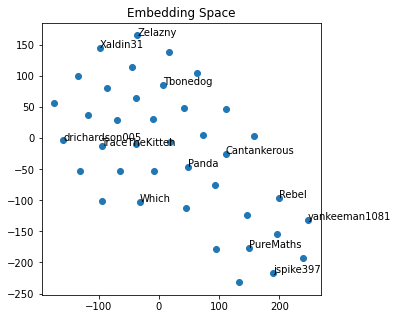

In [78]:
import matplotlib.pyplot as plt
import random

def plot_with_matplotlib(x_vals, y_vals, labels, num_to_label):
    plt.figure(figsize=(5, 5))
    plt.scatter(x_vals, y_vals)
    plt.title("Embedding Space")
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, num_to_label)
    for i in selected_indices:
        plt.annotate(name_map[labels[i]], (x_vals[i], y_vals[i]))
    plt.savefig('ex.png')
        
plot_with_matplotlib(x_vals, y_vals, labels, 12)